<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/2_Skill_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. imported the necessary libraries to perform the following tasks
2. calculated the skill count using `job_title_short` column
3. calculated the skill percentage for the top skills
4. plotting the data using visualization libraries


## Import Libraries and Data

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter the data for India

filtering the dataframe for the country India.

In [3]:
df_ind = df[df['job_country'] == 'India']

## Explode Skills

Converts the 'job_skills' column from a string into real Python lists using ast.literal_eval. Then explodes the lists so that each skill gets its own row. Finally shows the 'job_title_short' and 'skill' columns to check how skills are distributed across job roles.

In [4]:
df_skills = df_ind.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


## Count Skills per Job Title

Groups the DataFrame by `job_skills` and `job_title_short`, counting how many times each skill appears for different job roles. Converts the resulting Series into a DataFrame by resetting the index, and sorts the skill counts in descending order.



In [5]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


## Create List of Top 3 Roles

#### Focus: Data Analysts, Data Engineers, and Data Scientists

Filters the data to include the top 3 most popular data job roles.

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

## Plot Skill Counts

Creates a horizontal bar chart to display the top 5 skills for the top 3 job roles, showing the count of each skill.

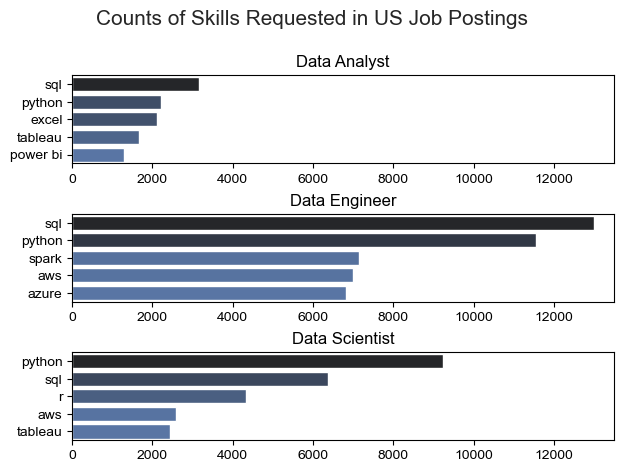

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 13500) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

## Convert Counts to Percentages

#### Focus: Counts alone don’t show the percentage of top skills for each job role.

So, we'll convert the counts to percentages in this case.

before calculating the percentage, we first need to get the total number of jobs for each job title. Here, we use the `job_title_short` column to count the total number of jobs per role. Then, we reset the index to convert the Series into a DataFrame and name the count column `job_total`.

In [8]:
# Use original df to get the count of job titles
df_job_title_count = df_ind['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the skill percentage. We start by merging `df_skill_count` with `df_job_title_coun`t using the `job_title_short` column. After that, we divide the `skill_count` by `job_total` to get the percentage of each skill for each job role, and store the result in a new column called `skill_percent`.



In [9]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


## Plot Percentage Count

Filters and sorts the DataFrame to get the top 5 skills for the top 3 job roles. After sorting in descending order, we reverse the result because, by default, a horizontal bar chart starts with the highest value at the bottom. Reversing it makes the chart show the highest skill percentage from top to bottom.

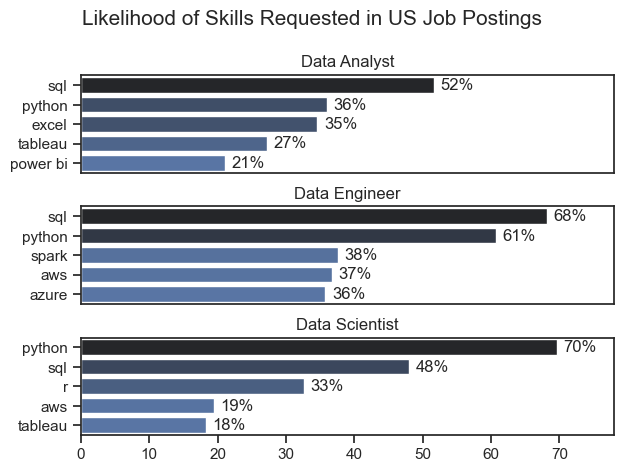

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()